In [274]:
#neccessary imports.
from statistics import mode
import pandas as pd
import numpy as np

#### Train Data Upload and EDA

In [243]:

train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [244]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [245]:
# from common sense youd imagine the ticket or cabin has little to no effect on who dies or not so it'll be dropped.
# I'd drop the passenger ID but its already in int type and won't require any more touch so ignored.

train_df = train_df.drop('Ticket', axis=1)
train_df = train_df.drop('Cabin', axis=1)

In [246]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [247]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [248]:
train_df['Sex'] = train_df['Sex'].map({'male' : 1, 'female' : 2})

In [249]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C


In [250]:
train_df['Embarked'] = train_df['Embarked'].dropna()

In [251]:
train_df['Embarked'] = train_df['Embarked'].map({'S':1, 'C':2, 'Q':3})

In [252]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 69.7+ KB


In [253]:
train_df.Age.isnull().sum()

177

In [254]:
train_df['Age'] = train_df['Age'].fillna(mode(train_df.Age))

In [255]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 69.7+ KB


In [256]:
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            train_df[label] = content.fillna(content.median())

In [257]:
for label, content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        train_df[label] = content.astype('category').cat.as_ordered()
        
for label, content in train_df.items():
    if pd.api.types.is_categorical_dtype(content):
        train_df[label] = pd.Categorical(content).codes+1

In [258]:
X_train = train_df.drop('Survived', axis=1)
Y = train_df.Survived

### Test Data Upload and EDA

In [316]:
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [318]:
def process(df):
    df = df.drop('Ticket', axis=1)
    df = df.drop('Cabin', axis=1)
    df['Sex'] = df['Sex'].map({'male' : 1, 'female' : 2})
    df['Embarked'] = df['Embarked'].dropna()
    df['Embarked'] = df['Embarked'].map({'S':1, 'C':2, 'Q':3})
    df['Age'] = df['Age'].fillna(mode(df['Age']))
    df['Name'] = df['Name'].astype('category').cat.as_ordered()
    df['Name'] = pd.Categorical(df['Name']).codes+1
    return df

test_df = process(test_df)   

In [319]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int16  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int16(1), int64(6)
memory usage: 27.1 KB


In [323]:
test_df['Fare'] = test_df['Fare'].fillna(mode(test_df['Fare']))
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int16  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int16(1), int64(6)
memory usage: 27.1 KB


In [346]:
X_test = test_df
y_test = pd.read_csv('gender_submission.csv')

In [347]:
y_test = y_test.drop('PassengerId', axis=1)
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


### Training and Testing

In [348]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [361]:
reg = RandomForestClassifier()

model = reg.fit(X_train, Y)

In [365]:
model.score(X_test, y_test)

0.7703349282296651

In [363]:
models = {'Random Forest': RandomForestClassifier(),
         'Logistic Regression': LogisticRegression(),
         'Baggings' : BaggingClassifier()}

def train_and_test(model,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in model.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

      
train_and_test(models, X_train, X_test, Y, y_test)    

C:\Users\Surface\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest': 0.7727272727272727,
 'Logistic Regression': 0.9066985645933014,
 'Baggings': 0.7799043062200957}

### Feature Importance

In [366]:
data = model.feature_importances_

In [369]:
df = pd.DataFrame({'Feature': X_train.columns, 'Importance': data})

In [375]:
df = df.sort_values(by='Importance')
df

,Feature,Importance
6,Parch,0.023377
8,Embarked,0.024562
5,SibSp,0.034771
1,Pclass,0.083031
0,PassengerId,0.134975
4,Age,0.136340
2,Name,0.143909
7,Fare,0.161653
3,Sex,0.257382


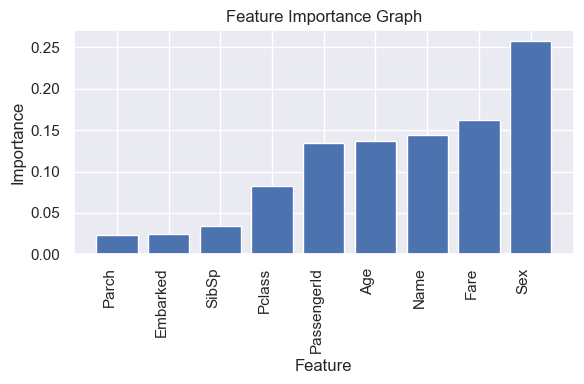

In [380]:
plt.figure(figsize=(6,4))
plt.bar(df.Feature, df.Importance)
plt.title('Feature Importance Graph')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()